# Introduction


AirBnB NYC Listing Regression Problem


Acknowledgements: The below work is a joint effort of my final project group for a course a York University. Thank you to all my group members for their efforts.

Note: For this project, as part of the final document I did alot of visualizations using Tableau as well. I intend to post that work in the future.

Business Problem:
We have developed the following business questions that need to be answered from this dataset

1. We are TriStar (“TriStar”), an established property management company in New York City.

2. Our clients who are property owners of Homes, Apartments and Private rooms in Manhattan have approached us to find a way to earn an income on their properties without engaging into yearly rental contracts.

3. More specifically, the owners are considering short term leases of their homes within the month of July and August each year.

4. Tristar Inc is considering the option of listing the properties on AirBnB and advise the owners what they should charge per 
night given  available rental information in the Manhattan area.

Analytical Objective

1. Provide information about the AirBnB listings in the NYC and specifically within the Manhattan neighbourhood.

2. Review and analyze classification data related to neighbourhood group and its relationship with price.  

3. Identify important input factors that can help predict the price a potential listing depending on the room type within the Manhattan neighbourhood.
 
4. Predict the per night listing price for the properties of our clients using a multiple regression model and implement other regression models such as Random Forest to compare model performance.


Understanding the dataset

The dataset can be found on www.Kaggle.com and contains over 48,000 rows and 16 variables including price per night, minimum nights required, number of listings by the same host, and etc.

We have neighbourhoods and their groups of the listings in NYC along with their longitude and latitude. These listings are of 3 types: Entire home/apt, Private rooms, Shared rooms.

Price is available as price per night.

Apart from these we have information related to the listings such as:
1. Total Number of reviews
2. Reviews per months which is an average reviews per month.
3. Availability_365 - the number of days the property is available within a year
4. Minimum nights - the minimum number of nights that the property can be booked for
5. Last Review - the last review date 


# Data Preparation and Exploratory Data Analysis

For this project we did alot of visualizations in Tableau which I shall post later. However, some visualizations using Python
are included below

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import dataset
data_raw = pd.read_csv('./AB_NYC_2019.csv')
data = data_raw.copy()

In [93]:
# Preview the dataset
print('The dataset hape:',data.shape)
data.head()

The dataset hape: (48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [94]:
# Check all data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

Last Review column needs to be changed into a date datatype

In [95]:
# Convert "last_review" to date type
data['last_review'] = pd.to_datetime(data['last_review'], infer_datetime_format=True)

In [96]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Initial stats summary table suggest existence of outliers within the data. Median price per night is 106 USD while mean is 153 USD.

# Checking for Missing Values

In [97]:
# Sumary all missing data
total = data.isnull().sum().sort_values(ascending=False) 
# Calculate the percentage
percent=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis=1, keys=['Total', 'Percent']).sort_values('Total', ascending=False)
missing_data

,Total,Percent
reviews_per_month,10052,0.205583
last_review,10052,0.205583
host_name,21,0.000429
name,16,0.000327
availability_365,0,0.000000
calculated_host_listings_count,0,0.000000
number_of_reviews,0,0.000000
minimum_nights,0,0.000000
price,0,0.000000
room_type,0,0.000000


Reviews per month and Last Review have 21% records with missing values. 

In [98]:
# Delete 'host_name' and 'name' because they are not important to the price
data.drop(['host_name','name'], axis=1, inplace=True)

In [99]:
# Check the number of zero reivews_per_month
# data[data.reviews_per_month==0].shape

# Fill all empty 'reviews_per_month' with 0
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)
# Find the earliest 'last_review'
earliest = min(data['last_review'])
# Use the earliest 'last_review' to fill up all empty 'last_review'
data['last_review'] = data['last_review'].fillna(earliest)

Filled the reviews_per_month missing values with 0. It is possible that these properties do not receive regular reviews and overall ratio of reviews_per_month is closer to 0.

last_review missing values is filled with earliest date available in the data set

In [100]:
# Convert 'last_review' into number in order to use it in our regression models
data['last_review'] = data['last_review'].apply(lambda x:x.toordinal() - earliest.toordinal())

In [101]:
# Sumary all missing data
total = data.isnull().sum().sort_values(ascending=False) 
# Calculate the percentage
percent=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis=1, keys=['Total', 'Percent']).sort_values('Total', ascending=False)
missing_data

,Total,Percent
availability_365,0,0.0
calculated_host_listings_count,0,0.0
reviews_per_month,0,0.0
last_review,0,0.0
number_of_reviews,0,0.0
minimum_nights,0,0.0
price,0,0.0
room_type,0,0.0
longitude,0,0.0
latitude,0,0.0


In [102]:
# List all the columns
data.columns.tolist()

['id',
 'host_id',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

checking unique values within the host_id and id columns 

In [103]:
# Check how many unique host_id
total = len(data['host_id'].unique())
percent = len(data['host_id'].unique())/data.shape[0] * 100
print('Unique items in host_id is:{0}, it is {1:.2f}%'.format(total,percent))

# Check how many unique id
total = len(data['id'].unique())
percent = len(data['id'].unique())/data.shape[0] * 100
print('Unique items in id is:{0}, it is {1:.2f}%'.format(total,percent))

Unique items in host_id is:37457, it is 76.61%
Unique items in id is:48895, it is 100.00%


In [104]:
# There are too many unique items in host_id and id, delete them
data = data.drop(columns=['host_id', 'id'], axis=1)

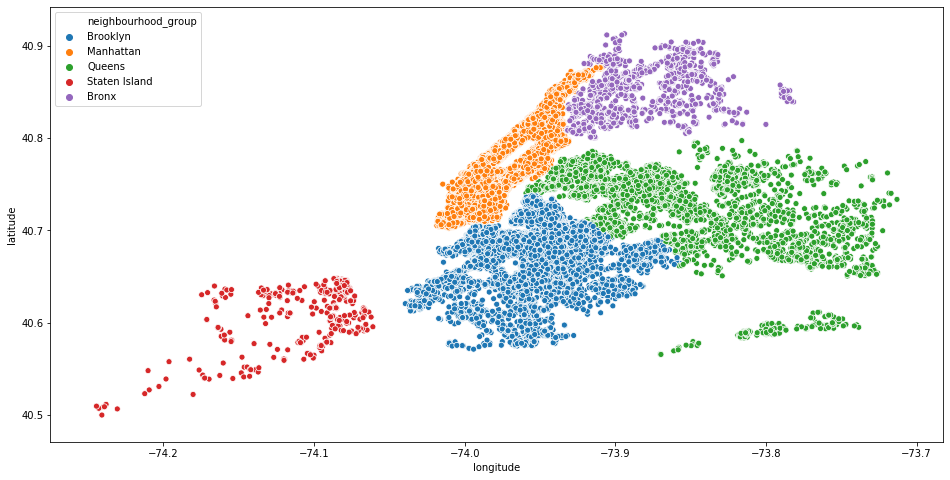

In [105]:
# Visualize all Airbnb location by the neighbourhood
plt.subplots(figsize=(16,8))
sns.scatterplot(x= data['longitude'], y=data['latitude'], hue='neighbourhood_group', data=data)

In [106]:
# Create a column that shows the price level
data['price_level'] = data['price'].apply(lambda x: 'Expensive' if x > 500
                                                    else ('Medium Cost' if x >= 200 and x < 500
                                                    else ('Reasonable Cost' if x >= 50 and x < 200
                                                    else'Low Cost')))

Visualizating location with Price Buckets

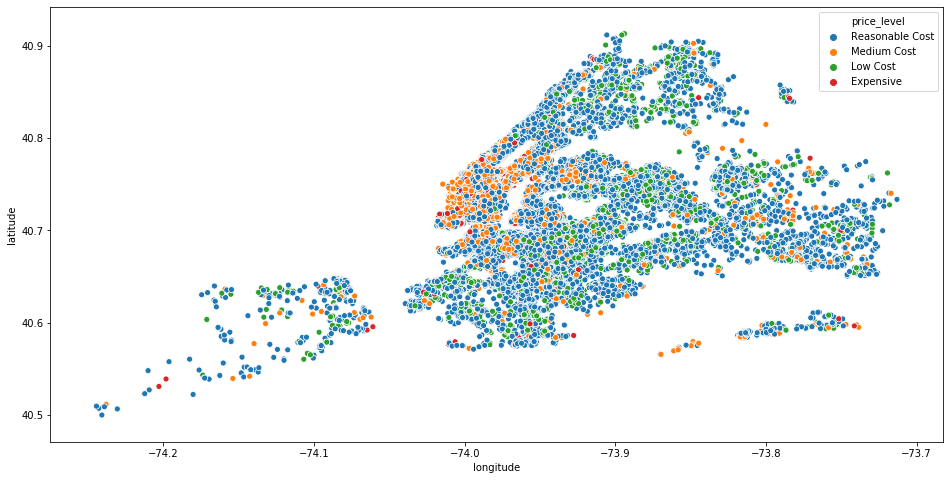

In [107]:
# Visualize all Airbnb location with the price level
plt.subplots(figsize=(16,8))
sns.scatterplot(x= data['longitude'], y=data['latitude'], hue='price_level', data=data)

Generally, across NYC entire homes/apartments and private rooms are reasonably priced however In Manhattan entire homes/apartments prices vary between 50 to 500 USD whereas majority of private rooms are reasonably priced.

In [108]:
# We don't need to keep the column 'price_level'
data = data.drop(columns=['price_level'], axis=1)

In [109]:
# Count Airbnb in different neighbourhood
data['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [110]:
# Create a subset that only includes Manhattan since this refers to our business problem
data_Manhattan = data[data['neighbourhood_group'] == 'Manhattan']

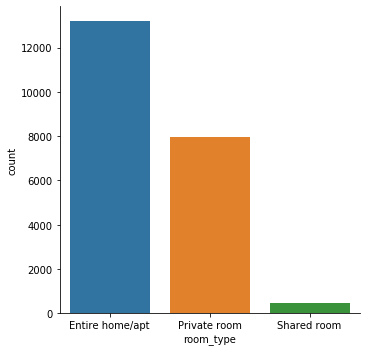

In [111]:
# Visualize the room type
sns.catplot(x='room_type',  kind='count', data=data_Manhattan)

61% listings in Manhattan are Entire home/apartments followed by 37% private rooms. 

# Distributions of th Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EAE1940>,
      dtype=object)

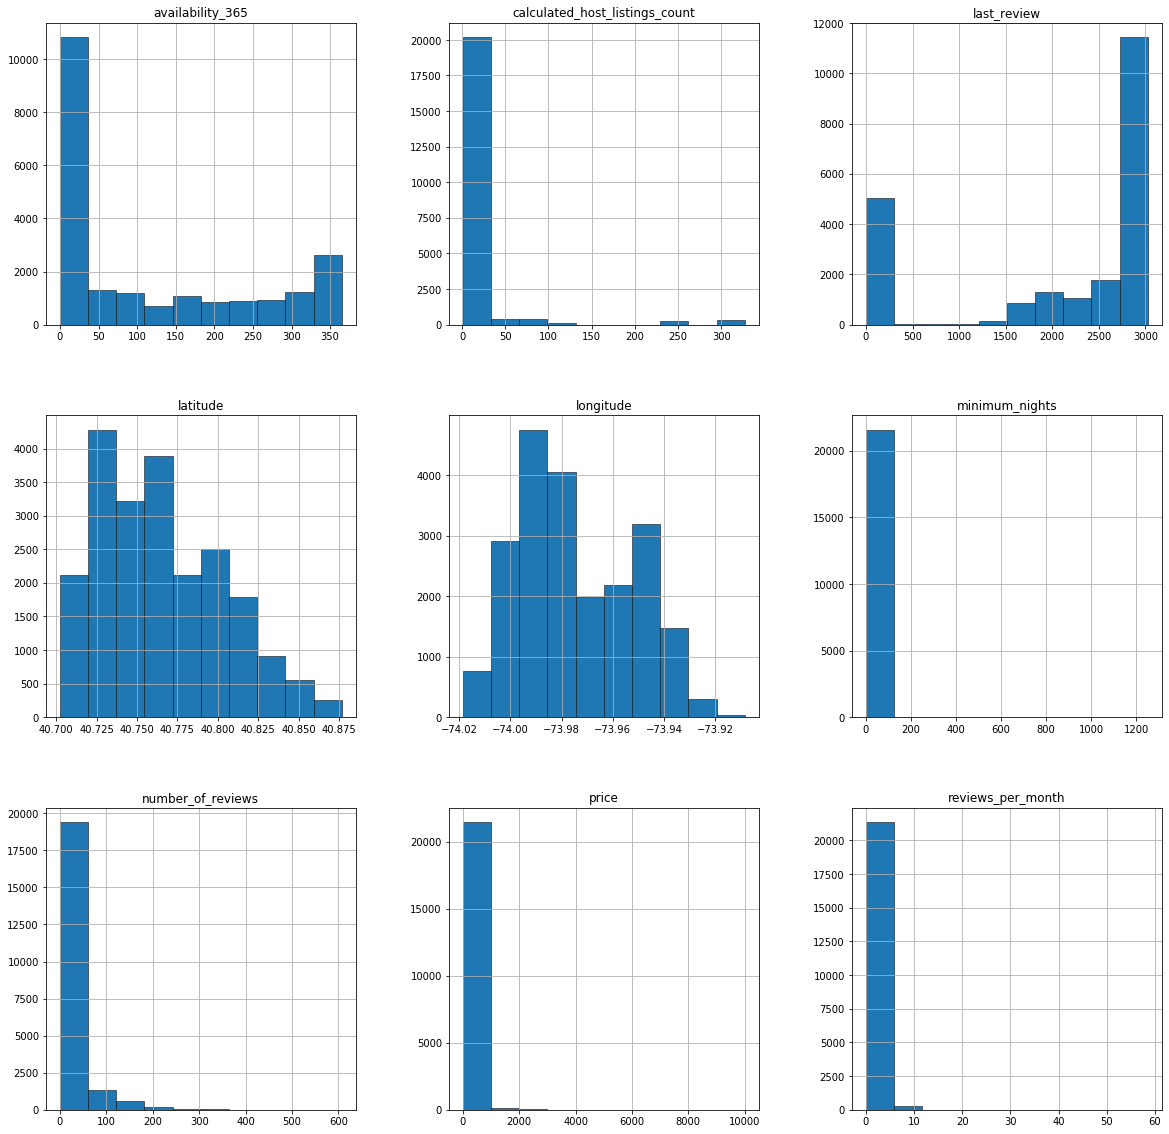

In [112]:
data_Manhattan.hist(edgecolor="black", linewidth=0.5, figsize=(20, 20))

Most of the variables are not normally distributed. We can further look at their relationship with price and amongst themselves in the following pair plot.

<Figure size 2160x2160 with 0 Axes>

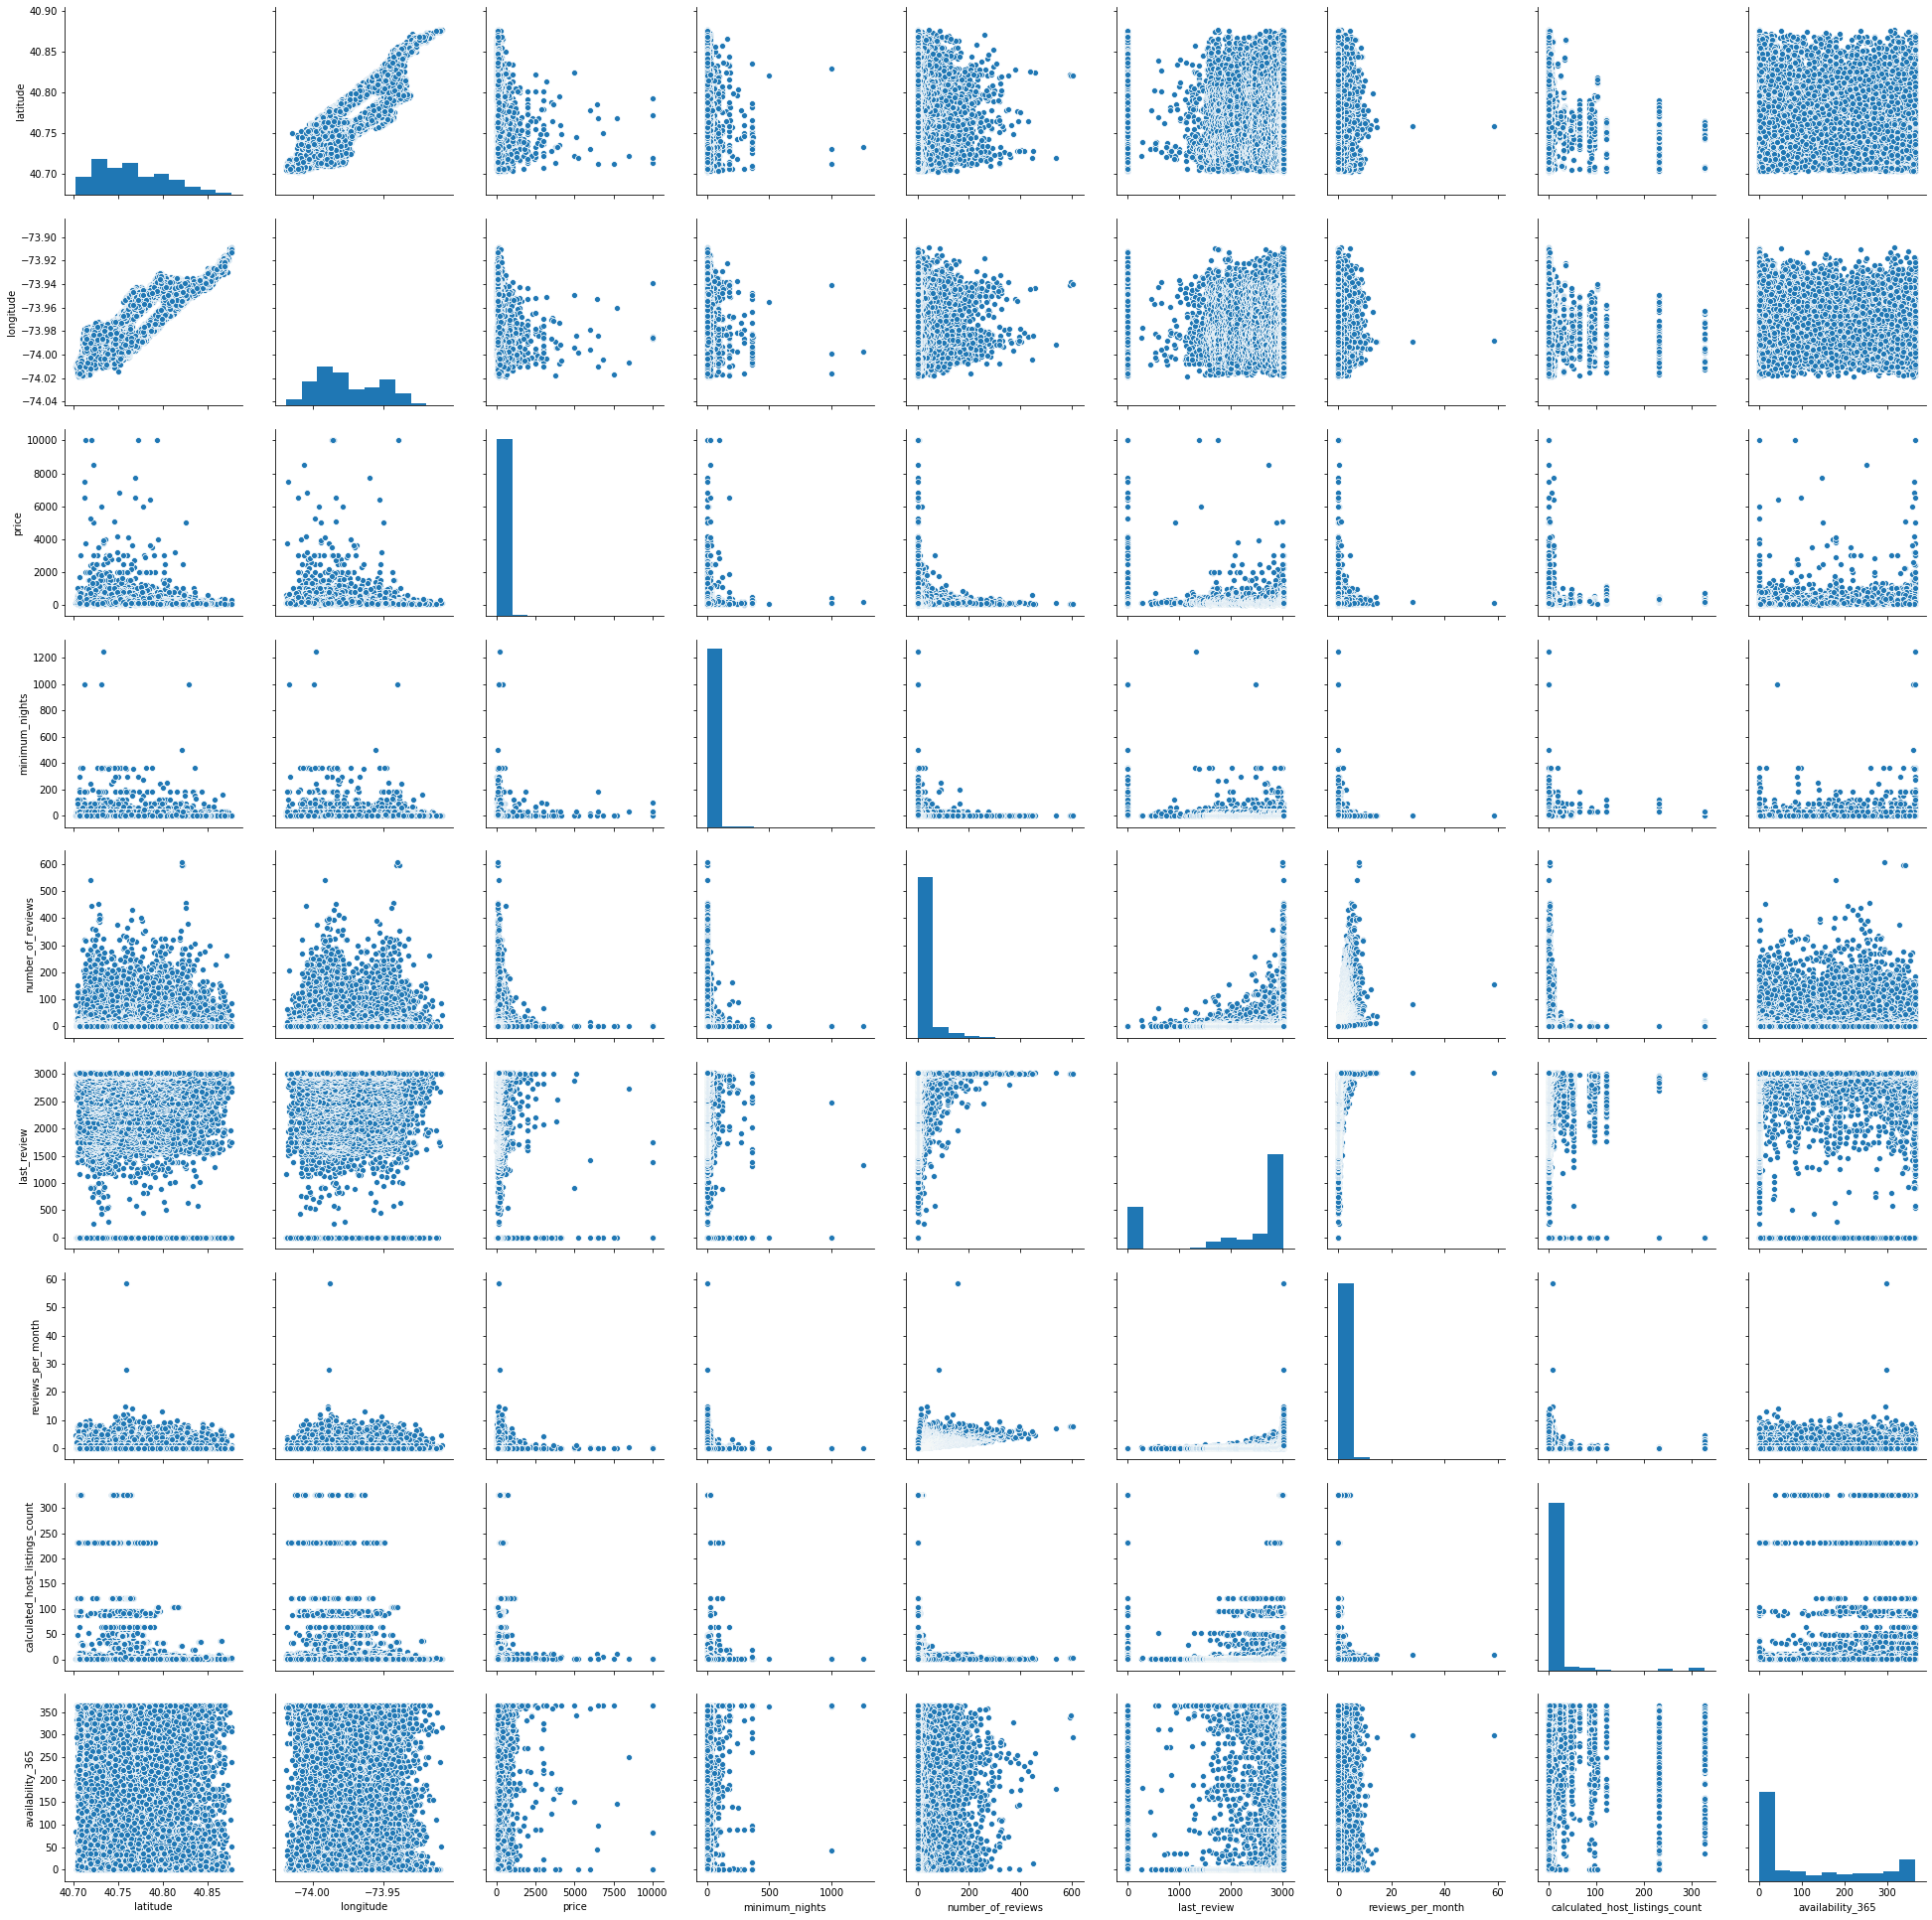

In [113]:
plt.figure(figsize=(30, 30))
sns.pairplot(data_Manhattan, height=3, diag_kind="hist")

Key Findings from Tableau Visualizations (to be posted later) and above graphs

1. Manhattan has the highest median price than across all room types

2. Entire homes/apartments have prices ranging USD 50 and 500  while majority of private rooms vary between 50 and 200 USD.

3. Significant number of outliers exist in the price variable across all room types.

4. Price movements vary across different minimum nights ranges.

5. It appears that within Entire homes/apartments price increases as number of reviews per month increases. However, it is possible that homes/apartments generally receive more positive reviews that can lead to price increases. There is no information on type of reviews available in the data set.

6. It appears that a long gap since the last review does not have an impact on price

7. Longitude and Latitude have a linear relationship with each other.

8. None of the variables appear to have a visibly linear relationship with price.

9. Price is not normally distributed


# Distribution of the Target Variable in Dataset

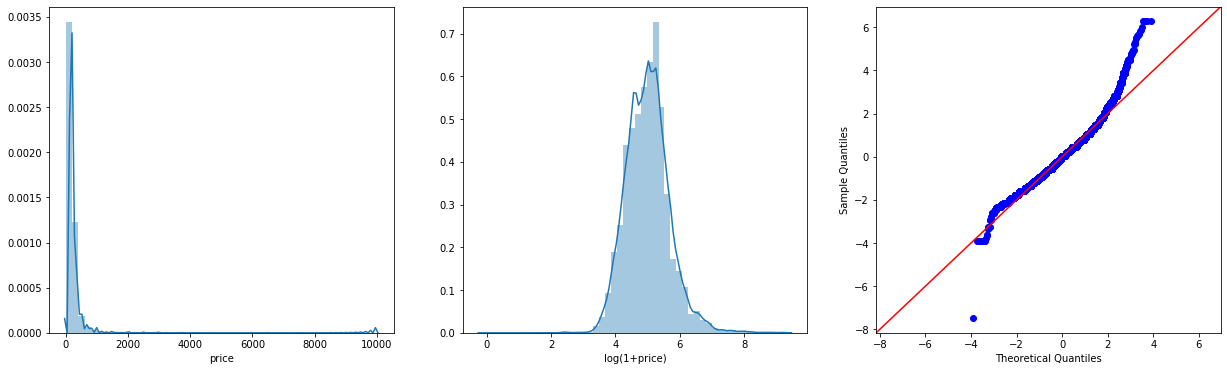

In [114]:
# Analyze the price
import statsmodels.api as sm
import scipy.stats as stats

fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(data_Manhattan['price'], ax=axes[0])
# Use np.lop1p function
sns.distplot(np.log1p(data_Manhattan['price']), ax=axes[1])
axes[1].set_xlabel('log(1+price)')
sm.qqplot(np.log1p(data_Manhattan['price']), # data
          stats.norm, #normalized distribution
          fit=True, # Try to fit
          line='45',
          ax=axes[2]);

In [115]:
# Normalize the price with the function np.log1p
data_Manhattan['price'] = np.log1p(data_Manhattan['price'])

C:\Users\Adminuser\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Normalized price with log function

# Linear Assumption  - Multicollinearity- Understanding Correlation between Variables

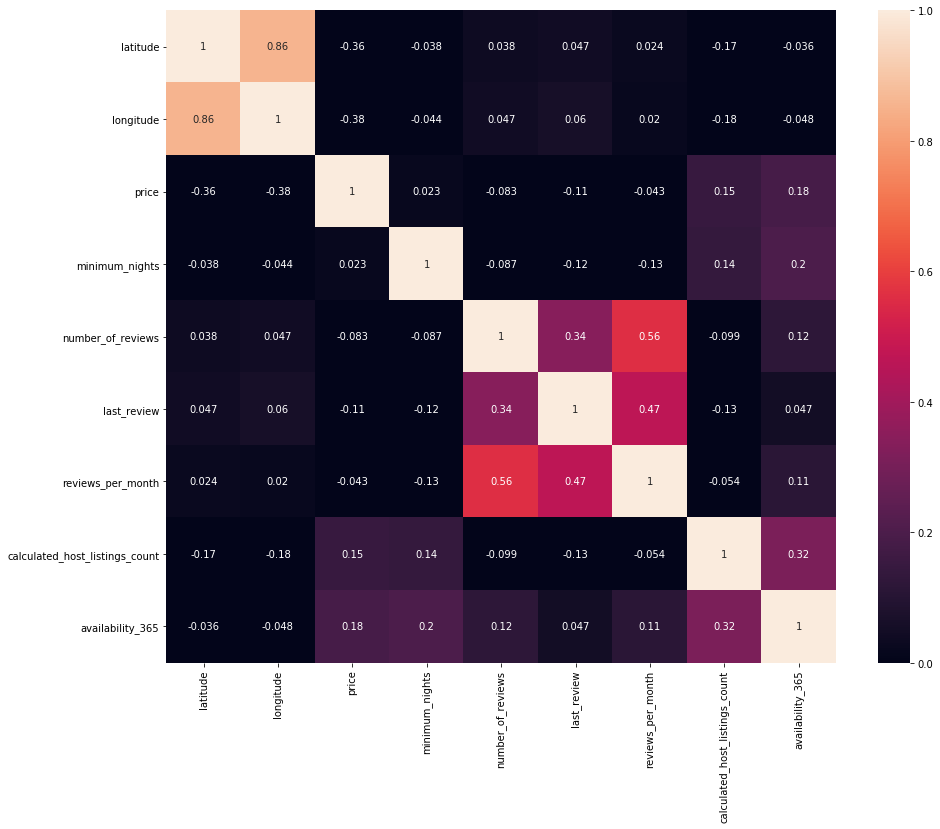

In [116]:
# Visualize the correlation with the heatmap
corr = data_Manhattan.corr()
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot =True, vmin = 0, vmax = 1)

1. Overall price does not seem to have a strong correlation with any of the variables

2. Longitude and latitude have strong correlation with each other and a similar correlation with price.

3. Reviews per month and number of reviews are mildly correlated with each others

4. Last review and reviews per month are also mildly correlated with each other


In [117]:
# converting categorical variables
class_variable = [col for col in data_Manhattan.columns if data_Manhattan[col].dtypes == object]
numerical_variable = [col for col in data_Manhattan.columns if data_Manhattan[col].dtypes != object]
data_Manhattan = pd.get_dummies(data_Manhattan, columns=class_variable)

In [118]:
data_Manhattan.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Manhattan,...,neighbourhood_Theater District,neighbourhood_Tribeca,neighbourhood_Two Bridges,neighbourhood_Upper East Side,neighbourhood_Upper West Side,neighbourhood_Washington Heights,neighbourhood_West Village,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
1,40.75362,-73.98377,5.420535,1,45,2976,0.38,2,355,1,...,0,0,0,0,0,0,0,1,0,0
2,40.80902,-73.94190,5.017280,3,0,0,0.00,1,365,1,...,0,0,0,0,0,0,0,0,1,0
4,40.79851,-73.94399,4.394449,10,9,2793,0.10,1,0,1,...,0,0,0,0,0,0,0,1,0,0
5,40.74767,-73.97500,5.303305,3,74,3008,0.59,1,129,1,...,0,0,0,0,0,0,0,1,0,0
7,40.76489,-73.98493,4.382027,2,430,3010,3.47,1,220,1,...,0,0,0,0,0,0,0,0,1,0


# Checking Linear Relationship Assumption between independent and dependent variables

We can check the relationship of a few independent variables with price.

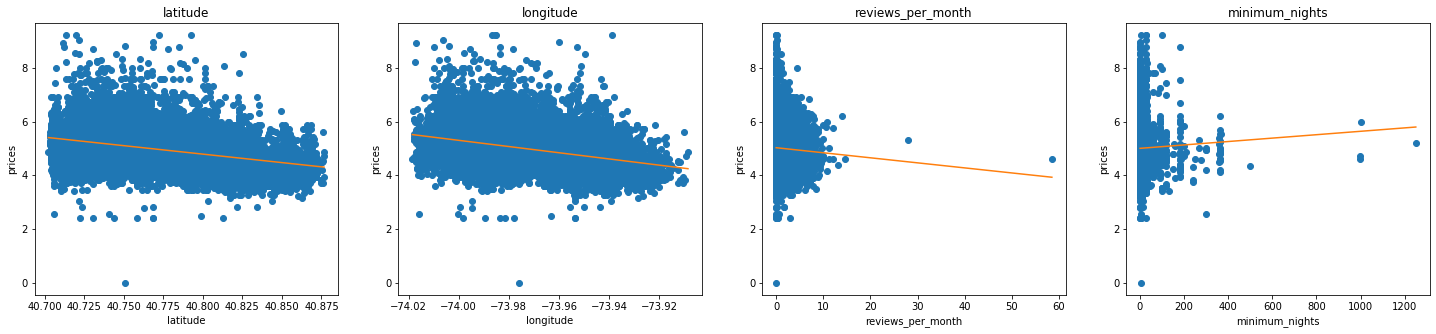

In [119]:
plt.figure(figsize=(25, 5))

columns = {'minimum_nights','reviews_per_month','latitude','longitude'}

for i, col in enumerate(columns):

    plt.subplot(1, 4, i+1)
    x = data_Manhattan[col]
    y = data_Manhattan['price']
    plt.plot(x, y,'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')


The above graphs show us that there prices points vary across any given latitude, longtitude, last review and minimum_nights. The graphs show us that there is not a perfect linear relationship of the variables with Price.

In [120]:
data_Manhattan.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Manhattan,...,neighbourhood_Theater District,neighbourhood_Tribeca,neighbourhood_Two Bridges,neighbourhood_Upper East Side,neighbourhood_Upper West Side,neighbourhood_Washington Heights,neighbourhood_West Village,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
1,40.75362,-73.98377,5.420535,1,45,2976,0.38,2,355,1,...,0,0,0,0,0,0,0,1,0,0
2,40.80902,-73.94190,5.017280,3,0,0,0.00,1,365,1,...,0,0,0,0,0,0,0,0,1,0
4,40.79851,-73.94399,4.394449,10,9,2793,0.10,1,0,1,...,0,0,0,0,0,0,0,1,0,0
5,40.74767,-73.97500,5.303305,3,74,3008,0.59,1,129,1,...,0,0,0,0,0,0,0,1,0,0
7,40.76489,-73.98493,4.382027,2,430,3010,3.47,1,220,1,...,0,0,0,0,0,0,0,0,1,0


In [121]:
# adjusting minimum nights to a maximum of 365
data_Manhattan = data_Manhattan[data_Manhattan['minimum_nights'] <= 365]

# Linear Assumption : Variables follow a Normal Distribution

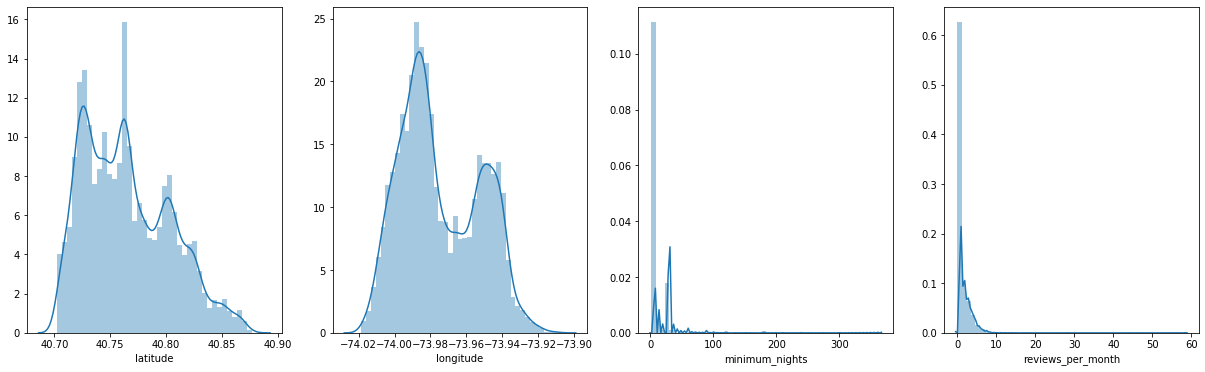

In [122]:
fig, axes = plt.subplots(1,4, figsize=(21,6))
sns.distplot(data_Manhattan['latitude'], ax=axes[0])
sns.distplot(data_Manhattan['longitude'], ax=axes[1])
sns.distplot(data_Manhattan['minimum_nights'], ax=axes[2])
sns.distplot(data_Manhattan['reviews_per_month'], ax=axes[3])



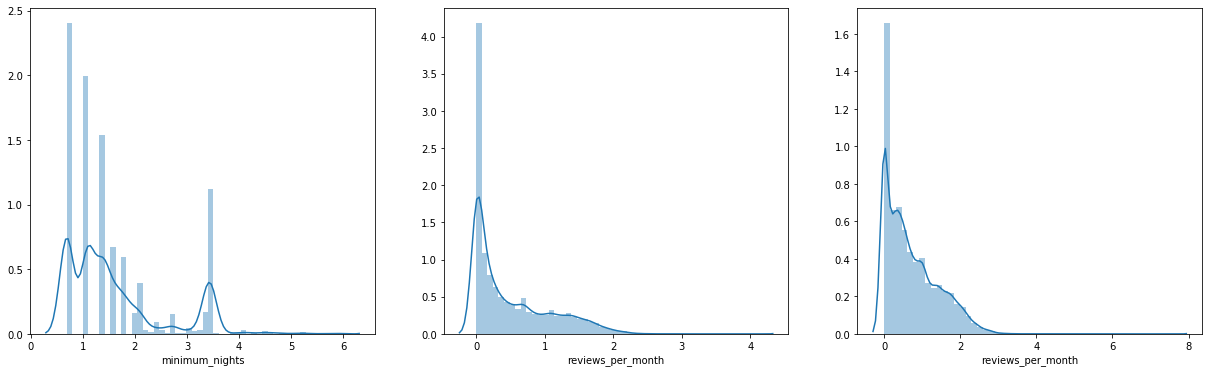

In [123]:
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(np.log1p(data_Manhattan['minimum_nights']), ax=axes[0])
sns.distplot(np.log1p(data_Manhattan['reviews_per_month']), ax=axes[1])
sns.distplot(np.sqrt(data_Manhattan['reviews_per_month']), ax=axes[2])



Log treatment for Minimum nights improves the normal distribution but reviews per month distribution does not improve irrespective of the scaling used

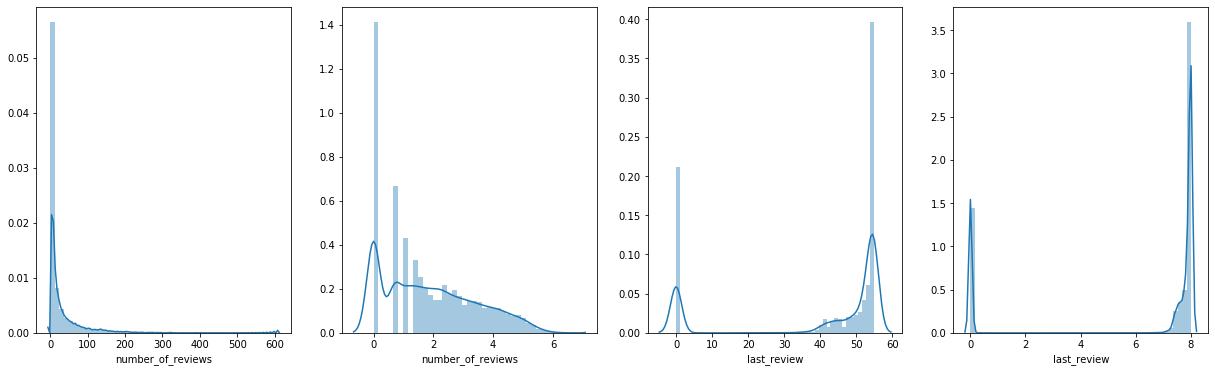

In [124]:
fig, axes = plt.subplots(1,4, figsize=(21,6))
sns.distplot(data_Manhattan['number_of_reviews'], ax=axes[0])
sns.distplot(np.log1p(data_Manhattan['number_of_reviews']), ax=axes[1])
sns.distplot(np.sqrt(data_Manhattan['last_review']), ax=axes[2])
sns.distplot(np.log1p(data_Manhattan['last_review']), ax=axes[3])


Since we could not achieve normalization of number of reviews and last review perhaps we can treat outliers.
visualizing distribution outliers through boxplots

<bound method Figure.tight_layout of <Figure size 1512x432 with 2 Axes>>

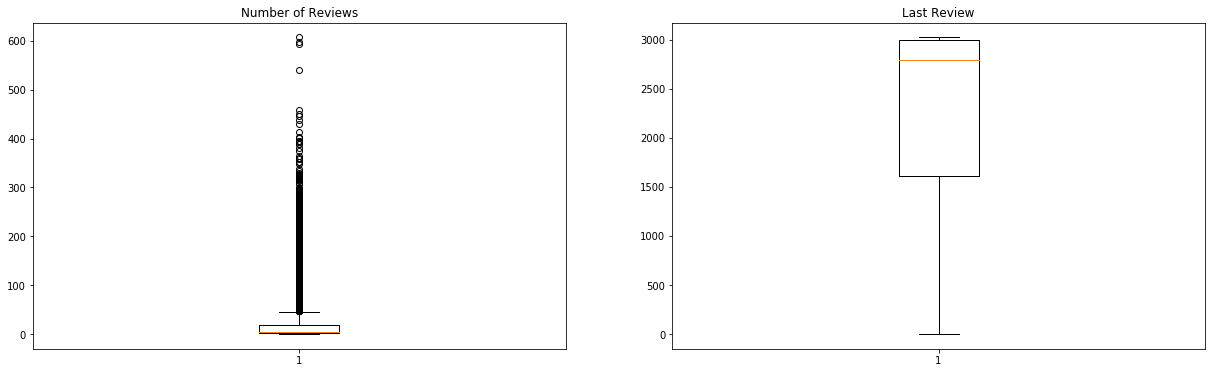

In [125]:
# 
fig2, axes2 = plt.subplots(1,2,figsize=(21,6))


axes2[0].boxplot(data_Manhattan.number_of_reviews)
axes2[1].boxplot(data_Manhattan.last_review)

axes2[0].set_title('Number of Reviews')
axes2[1].set_title('Last Review')


fig2.tight_layout


In [126]:
distR = 1.25 * (np.percentile(data_Manhattan['number_of_reviews'],75) - np.percentile(data_Manhattan['number_of_reviews'],25))
Q1R = np.percentile(data_Manhattan['number_of_reviews'],25)
Q3R = np.percentile(data_Manhattan['number_of_reviews'],75)


data_Manhattan = data_Manhattan.loc[(data_Manhattan['number_of_reviews'] > Q1R-distR) & (data_Manhattan['number_of_reviews'] < Q3R+distR)]


{'whiskers': [<matplotlib.lines.Line2D at 0x319da630>,
 'caps': [<matplotlib.lines.Line2D at 0x317dca58>,
 'boxes': [<matplotlib.lines.Line2D at 0x317d0f60>],
 'medians': [<matplotlib.lines.Line2D at 0x317dce80>],
 'fliers': [<matplotlib.lines.Line2D at 0x317e6470>],
 'means': []}

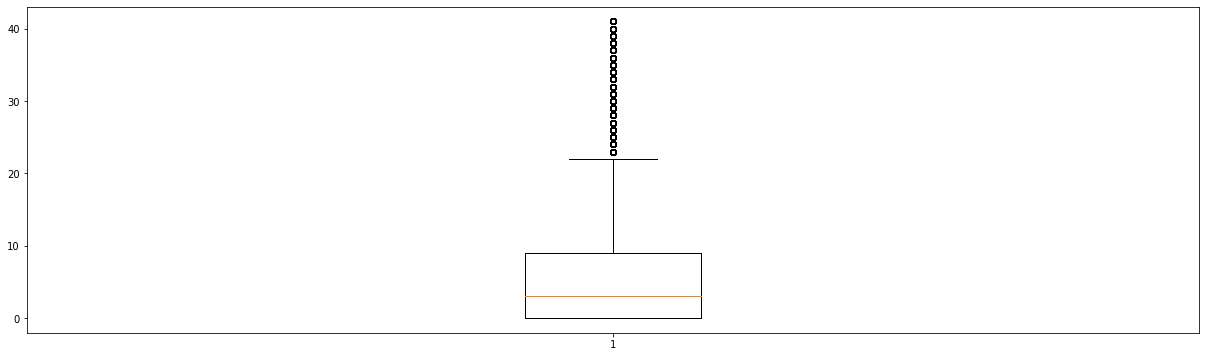

In [127]:
fig2, axes2 = plt.subplots(1,1,figsize=(21,6))


axes2.boxplot(data_Manhattan.number_of_reviews)


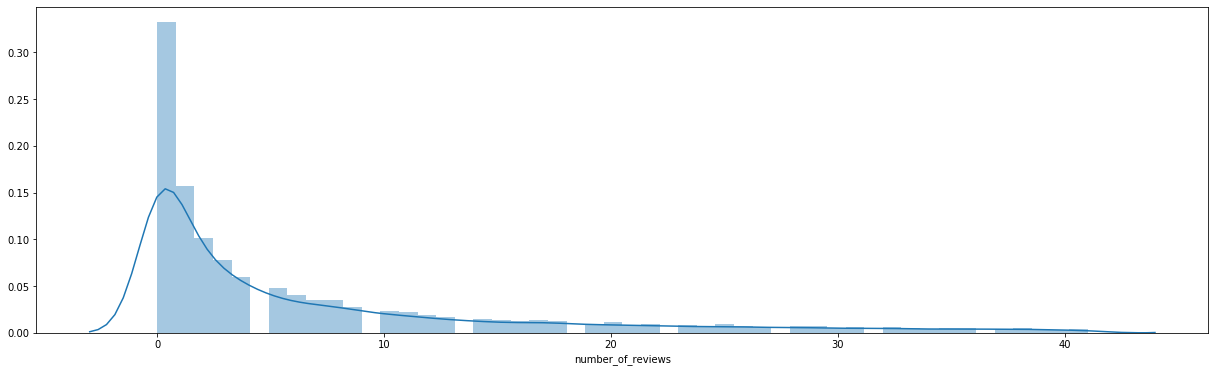

In [128]:
fig, axes = plt.subplots(1,1, figsize=(21,6))
sns.distplot(data_Manhattan['number_of_reviews'], ax=axes)


No significant improvement in achieving normalization. We can thus use standard scaler to scale the columns number of reviews, minimum nights and availability_365

from sklearn.preprocessing import StandardScaler

scalecolumns = ['number_of_reviews','minimum_nights','availability_365']
sc = StandardScaler()
data_Manhattan[scalecolumns] = sc.fit_transform(data_Manhattan[scalecolumns])

In [129]:
data_Manhattan.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Manhattan,...,neighbourhood_Theater District,neighbourhood_Tribeca,neighbourhood_Two Bridges,neighbourhood_Upper East Side,neighbourhood_Upper West Side,neighbourhood_Washington Heights,neighbourhood_West Village,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
count,18451.000000,18451.000000,18451.000000,18451.000000,18451.000000,18451.000000,18451.000000,18451.000000,18451.000000,18451.0,...,18451.000000,18451.000000,18451.000000,18451.000000,18451.000000,18451.000000,18451.000000,18451.000000,18451.000000,18451.000000
mean,40.764449,-73.975048,5.027289,9.106986,6.903853,1935.314455,0.656082,14.707875,105.438079,1.0,...,0.014146,0.009105,0.002981,0.084819,0.093870,0.042491,0.035825,0.627012,0.351580,0.021408
std,0.038416,0.022061,0.682562,19.870629,9.417954,1246.013822,1.163585,52.019865,134.109301,0.0,...,0.118094,0.094988,0.054517,0.278620,0.291656,0.201712,0.185858,0.483612,0.477477,0.144744
min,40.703280,-74.018510,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.731710,-73.992050,4.584967,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.760260,-73.980580,5.017280,3.000000,3.000000,2606.000000,0.170000,1.000000,17.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,40.793455,-73.954835,5.420535,7.000000,9.000000,2983.000000,0.740000,2.000000,215.500000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,40.876630,-73.909820,9.210440,365.000000,41.000000,3024.000000,14.620000,327.000000,365.000000,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
# drop reviews per month as we already have two columns to explain the review factor
data_Manhattan = data_Manhattan.drop(columns=['reviews_per_month'], axis=1)



# K-Means Clustering

In [131]:
# creating an array of the values of column price, minimum nights and number of reviews for clustering
X = data_Manhattan.iloc[:,2:4].values
len(X)


18451

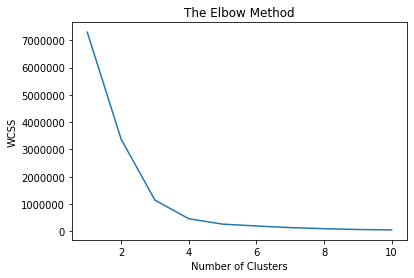

In [132]:
# implementing K-Means

from sklearn.cluster import KMeans

# variable for storing Within-Cluster-Sum-of-Squares (WCSS)
wcss = []

# for 10 clusters for loop and append in wcss each wcss from the for loop
# K Means arguments n_clusters is number of clusters
# init is the random initialization method so to avoid the random initialization trap 
# we use k means ++
# max_iter is the maximum number of iterations to find the final clusters 
#default is 300
#n_init is the number of times KMeans algorithm will run for different centroids
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter=300,
                    n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# displaying elbow
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [133]:
#The above elbow method suggest that we should go for 4 clusters. 

# applying K Means with the optimal clusters which is 4 from above elbow method
kmeans = KMeans(n_clusters=4, init = 'k-means++', max_iter=300,
                    n_init=10,random_state=0)

# fit predict will tell the cluster to which every data point belongs to
# returns a vector
y_kmeans = kmeans.fit_predict(X)

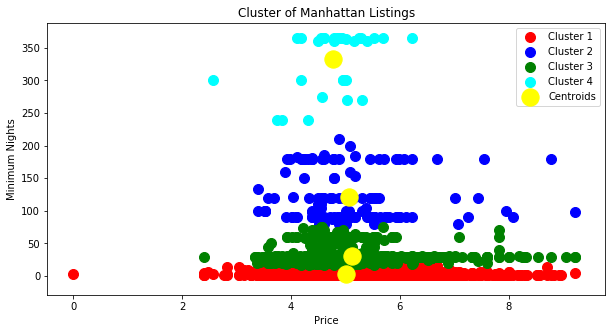

In [134]:
# plotting the 4 clusters
plt.figure(figsize=(10, 5))

plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1], s = 100 , c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1], s = 100 , c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1], s = 100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1], s = 100 , c='cyan', label ='Cluster 4')


# centroids plotting
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
            s = 300 , c='yellow', label ='Centroids')

plt.title('Cluster of Manhattan Listings')
plt.xlabel('Price')
plt.ylabel('Minimum Nights')
plt.legend()
plt.show()


In [135]:
# Calculate silhouette_score. The Silhouette value is a measure of how similar objects are within 
#their own clusters compared to other clusters
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.8813190165592618


Cluster 4 is not large enough to provide enough interpretability. Hence we can test implementing 3 clusters and check if we can maintain the silhouette score

In [136]:
# checking K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter=300,
                    n_init=10,random_state=0)

# fit predict will tell the cluster to which every data point belongs to
# returns a vector
y_kmeans = kmeans.fit_predict(X)

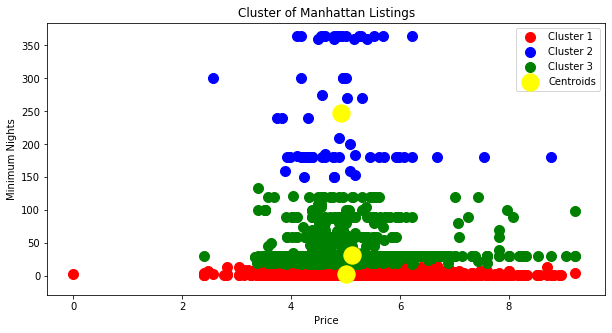

In [137]:
plt.figure(figsize=(10, 5))

plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1], s = 100 , c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1], s = 100 , c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1], s = 100, c='green', label ='Cluster 3')

# centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
            s = 300 , c='yellow', label ='Centroids')

plt.title('Cluster of Manhattan Listings')
plt.xlabel('Price')
plt.ylabel('Minimum Nights')
plt.legend()
plt.show()


In [138]:
print(silhouette_score(X, kmeans.labels_))
# storing the labels of each datapoint
clarr= kmeans.labels_
kmeans.labels_

0.8747534866520944


array([0, 0, 2, ..., 0, 0, 0])

# Model Development and Testing

In [139]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

#splitting into train and test data
train,test = train_test_split(data_Manhattan,test_size=0.2)
print(train.shape)
print(test.shape)



(14760, 44)
(3691, 44)


In [140]:
colnames= data_Manhattan.columns
colname2=[]

for colname in colnames:
    if colname != 'price':
        colname2.append(colname)
    
colname2


['latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'calculated_host_listings_count',
 'availability_365',
 'neighbourhood_group_Manhattan',
 'neighbourhood_Battery Park City',
 'neighbourhood_Chelsea',
 'neighbourhood_Chinatown',
 'neighbourhood_Civic Center',
 'neighbourhood_East Harlem',
 'neighbourhood_East Village',
 'neighbourhood_Financial District',
 'neighbourhood_Flatiron District',
 'neighbourhood_Gramercy',
 'neighbourhood_Greenwich Village',
 'neighbourhood_Harlem',
 "neighbourhood_Hell's Kitchen",
 'neighbourhood_Inwood',
 'neighbourhood_Kips Bay',
 'neighbourhood_Little Italy',
 'neighbourhood_Lower East Side',
 'neighbourhood_Marble Hill',
 'neighbourhood_Midtown',
 'neighbourhood_Morningside Heights',
 'neighbourhood_Murray Hill',
 'neighbourhood_NoHo',
 'neighbourhood_Nolita',
 'neighbourhood_Roosevelt Island',
 'neighbourhood_SoHo',
 'neighbourhood_Stuyvesant Town',
 'neighbourhood_Theater District',
 'neighbourhood_Tribeca',
 'neighb

In [141]:
model1= sm.OLS(train['price'],train[colname2])
res = model1.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     297.3
Date:                Thu, 23 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:02:51   Log-Likelihood:                -10884.
No. Observations:               14760   AIC:                         2.185e+04
Df Residuals:                   14719   BIC:                         2.216e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
latitu

1. Low R2 0.447 and Adj R2 0.445
2. Overall Prob(F-stat) statistically significant
3. All variables statistically significant except number of reviews


# Model Improvement

In [142]:
data_Manhattan = data_Manhattan.drop(columns=['number_of_reviews'], axis=1)


In [143]:
colnames= data_Manhattan.columns
colname3=[]

for colname in colnames:
    if colname != 'price':
        colname3.append(colname)
    
colname3

['latitude',
 'longitude',
 'minimum_nights',
 'last_review',
 'calculated_host_listings_count',
 'availability_365',
 'neighbourhood_group_Manhattan',
 'neighbourhood_Battery Park City',
 'neighbourhood_Chelsea',
 'neighbourhood_Chinatown',
 'neighbourhood_Civic Center',
 'neighbourhood_East Harlem',
 'neighbourhood_East Village',
 'neighbourhood_Financial District',
 'neighbourhood_Flatiron District',
 'neighbourhood_Gramercy',
 'neighbourhood_Greenwich Village',
 'neighbourhood_Harlem',
 "neighbourhood_Hell's Kitchen",
 'neighbourhood_Inwood',
 'neighbourhood_Kips Bay',
 'neighbourhood_Little Italy',
 'neighbourhood_Lower East Side',
 'neighbourhood_Marble Hill',
 'neighbourhood_Midtown',
 'neighbourhood_Morningside Heights',
 'neighbourhood_Murray Hill',
 'neighbourhood_NoHo',
 'neighbourhood_Nolita',
 'neighbourhood_Roosevelt Island',
 'neighbourhood_SoHo',
 'neighbourhood_Stuyvesant Town',
 'neighbourhood_Theater District',
 'neighbourhood_Tribeca',
 'neighbourhood_Two Bridges',


In [144]:
model1= sm.OLS(train['price'],train[colname3])
res = model1.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     304.8
Date:                Thu, 23 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:03:53   Log-Likelihood:                -10885.
No. Observations:               14760   AIC:                         2.185e+04
Df Residuals:                   14720   BIC:                         2.215e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
latitu

Efforts to improve the model:

Backward Elimination and Scaling but no improvement in results.

Perhaps we need to check other regression techniques.

In [145]:
mcoeff= res.params
mcoeff


latitude                              -2.232246
longitude                             -6.479830
minimum_nights                        -0.004080
last_review                           -0.000042
calculated_host_listings_count        -0.000385
availability_365                       0.000934
neighbourhood_group_Manhattan       -281.123919
neighbourhood_Battery Park City       -8.864945
neighbourhood_Chelsea                 -8.746450
neighbourhood_Chinatown               -9.035745
neighbourhood_Civic Center            -8.981351
neighbourhood_East Harlem             -8.703963
neighbourhood_East Village            -8.864634
neighbourhood_Financial District      -8.953597
neighbourhood_Flatiron District       -8.568169
neighbourhood_Gramercy                -8.752617
neighbourhood_Greenwich Village       -8.777509
neighbourhood_Harlem                  -8.777452
neighbourhood_Hell's Kitchen          -8.748225
neighbourhood_Inwood                  -8.722356
neighbourhood_Kips Bay                -8

# Checking Linear Regression results with clusters

In [146]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

data_Manhattan['Cluster'] = clarr
cluster1= data_Manhattan[data_Manhattan['Cluster']==0]
cluster2= data_Manhattan[data_Manhattan['Cluster']==1]
cluster3= data_Manhattan[data_Manhattan['Cluster']==2]

#splitting into train and test data for cluster 1
train,test = train_test_split(cluster1,test_size=0.2)
print(train.shape)
print(test.shape)

(12140, 44)
(3036, 44)


In [147]:
colnames= data_Manhattan.columns
colname4=[]

for colname in colnames:
    if colname != 'price':
        colname4.append(colname)


In [148]:
clus1= sm.OLS(train['price'],train[colname4])
res = clus1.fit()
# cluster 1 regression results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     297.0
Date:                Thu, 23 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:05:46   Log-Likelihood:                -8551.3
No. Observations:               12140   AIC:                         1.718e+04
Df Residuals:                   12100   BIC:                         1.748e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
latitu

C:\Users\Adminuser\Anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Adminuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Adminuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Adminuser\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [149]:
#splitting into train and test data for cluster 3
train,test = train_test_split(cluster3,test_size=0.2)
print(train.shape)
print(test.shape)


(2565, 44)
(642, 44)


In [150]:
clus3= sm.OLS(train['price'],train[colname4])
res = clus3.fit()
# cluster 3 regression results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     47.02
Date:                Thu, 23 Jan 2020   Prob (F-statistic):          6.22e-261
Time:                        16:06:29   Log-Likelihood:                -1934.1
No. Observations:                2565   AIC:                             3946.
Df Residuals:                    2526   BIC:                             4174.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
latitu

# Comparing prediction with actual numbers through Linear Regression

In [152]:
from sklearn.linear_model import LinearRegression
# running a linear regression model
model = LinearRegression()
# training the model on the training data
model.fit(train[colname3],train['price'])
# doing prediction on the test data based on the trained model
pricepred = model.predict(test[colname3])
# creating a dataframe with actual and predicted prices
odf= pd.DataFrame({'Actual':np.exp(test['price']),'Predicted':np.exp(pricepred)})
# comparing first 25 predicted prices with the actual prices from the test data in graph
odf.head(25)


,Actual,Predicted
46275,228.0,202.436034
14346,111.0,185.791001
17087,126.0,155.127984
37993,270.0,225.058637
32411,84.0,253.032857
26658,151.0,166.672102
31384,121.0,153.736193
7850,500.0,172.649473
31310,66.0,73.216480
16016,701.0,206.059615


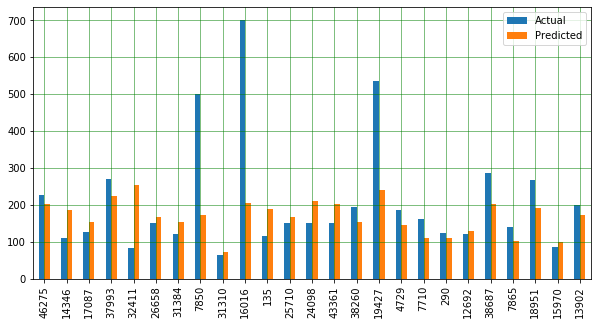

In [153]:
# comparing first 25 predicted prices with the actual prices from the test data in graph
odf2 = odf.head(25)
odf2.plot(kind='bar',figsize=(10,5))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.show()

In [154]:
# residual calculations

def residualcalc (model,features,target):
    predictions = model.predict(features)
    dfresults = pd.DataFrame({'Actual':target, 'Predicted': predictions})
    dfresults['residuals'] = abs(dfresults['Actual']) - abs(dfresults['Predicted'])
    return dfresults

    

In [155]:
# defining linear assumption function
def linearassumption (model,features,target):
    dfresults = residualcalc(model,features,target)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=dfresults, fit_reg=False, size=5)
        
    # Plotting the diagonal line
    line_coords = np.arange(dfresults.min().min(), dfresults.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()


C:\Users\Adminuser\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


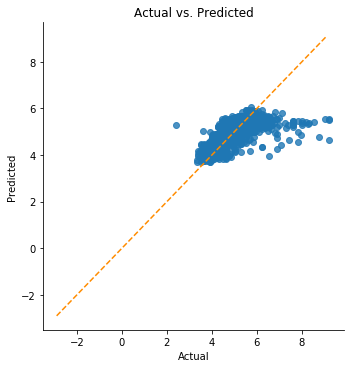

In [156]:
linearassumption(model,train[colname3],train['price'])

# Checking Assumption of Autocorrelation

In [157]:
def autocorrelation (model,features,target):
    from statsmodels.stats.stattools import durbin_watson
    
    # Calculating residuals for the Durbin Watson-tests
    dfresults = residualcalc(model, features, target)
    durbinWatson = durbin_watson(dfresults['residuals'])
    print('Durbin-Watson:', durbinWatson)

In [158]:
autocorrelation(model,train[colname3],train['price'])

Durbin-Watson: 1.9963020946104935


# A Durbin-Watson score of 1.996 shows that there is no autocorrelation in the data

# Checking Assumption of Homoscedasticity

In [159]:
# Homoscedasticity: Assumes that the errors exhibit constant variance
def homoscedasticity(model, features, target):
        
    # Calculating residuals for the plot
    dfresults = residualcalc(model, features, target)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=dfresults.index, y=dfresults.residuals, alpha=0.5)
    plt.plot(np.repeat(0, dfresults.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  

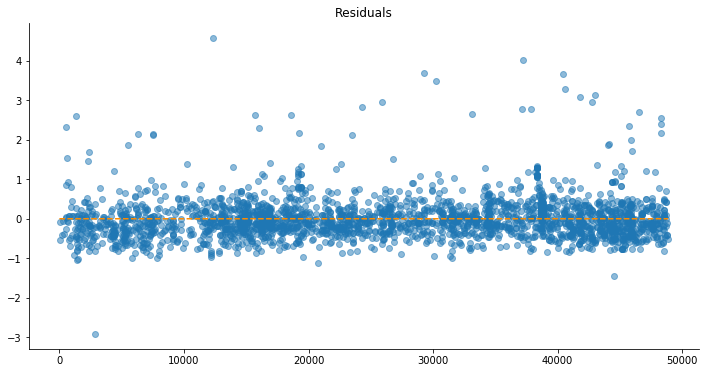

In [160]:
homoscedasticity(model,train[colname3],train['price'])

Variance in error terms do seem to be relatively constant

# Trying other regression techniques

In [78]:
# Create the training and target datasets
prices = data_Manhattan['price']
features = data_Manhattan.drop('price', axis = 1)
print("The shape of training dataset:{0}; the shape of target dataset:{1}".format(features.shape,prices.shape))

The shape of training dataset:(18457, 42); the shape of target dataset:(18457,)


In [79]:
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=1)
print(f'The shape of x_train:{x_train.shape}')
print(f'The shape of x_test:{x_test.shape}')
print(f'The shape of y_train:{y_train.shape}')
print(f'The shape of y_test:{y_test.shape}')

The shape of x_train:(14765, 42)
The shape of x_test:(3692, 42)
The shape of y_train:(14765,)
The shape of y_test:(3692,)


# Random Forest Implementation

In [81]:
from sklearn.ensemble import RandomForestRegressor
m = RandomForestRegressor(n_estimators=15, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(x_train,y_train)
trainscore=m.score(x_train,y_train)
print('The train score for Random Forest{0: .2f}'.format(trainscore))
y_pred=m.predict(x_test)  
testscore=m.score(x_test,y_test)    
print('The test score for Random Forest{0: .2f}'.format(testscore))


The train score for Random Forest 0.79
The test score for Random Forest 0.55


While the train score looks fine but test scores are not close to it. It means there is an overfitting issue with Random Forest Implementation

In [82]:
# getting predictions from each of the 15 trees (n_estimators)
preds = np.stack([t.predict(x_test) for t in m.estimators_])

In [83]:
preds.shape

(15, 3692)

15 predictions for each of the rows in test set

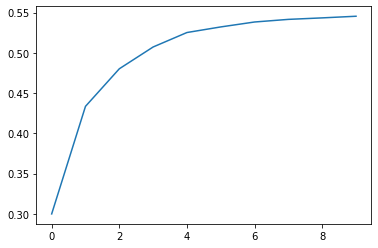

In [84]:
from sklearn import metrics

# to plot the variation in R2 as the number of trees increase
plt.plot([metrics.r2_score(y_test, np.mean(preds[:i+1], axis=0)) for i in range(10)])

We can see from the above graph that even if we increase the number of trees our test scores will not improve

In [85]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt=GradientBoostingRegressor(n_estimators=100) 
gbrt.fit(x_train, y_train) 
y_pred=gbrt.predict(x_test) 

In [86]:
print("Feature Importance")
print(gbrt.feature_importances_)

#Print the R-squared value for train/test. 
#This explains how much of the variance in the data our model is able to decipher. 
gbtrainscore=gbrt.score(x_train, y_train)
gbtestscore=gbrt.score(x_test, y_test) 
print("R-squared for Train: %.2f" %gbtrainscore) 
print("R-squared for Test: %.2f" %gbtestscore)

Feature Importance
[1.08947049e-01 9.92149623e-02 5.95277906e-02 3.28632905e-02
 2.73228621e-02 7.58712891e-02 0.00000000e+00 2.28184558e-04
 6.82212901e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.23680514e-04 0.00000000e+00
 0.00000000e+00 1.87586900e-04 7.61480754e-05 0.00000000e+00
 2.66176533e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.49313718e-02 2.47368472e-04 3.47590001e-04 1.36031624e-04
 1.56006731e-04 4.47413939e-04 1.12282555e-03 8.91261571e-05
 2.27543424e-03 8.83235519e-03 0.00000000e+00 0.00000000e+00
 6.64181940e-04 0.00000000e+00 0.00000000e+00 5.44994939e-01
 6.96520357e-04 9.86159388e-03]
R-squared for Train: 0.53
R-squared for Test: 0.54


Gradient Boosting test scores are also very similar to that of Random Forest. Both Gradient Boosting and Random Forest regressions have shown better results than multiple Linear regression. However, these scores are far from satisfactory.

Future action: Ideas on how to improve the model

1. Perhaps bring in more variables such as real estate pricing data from the same areas

2. Research further model improvement techniques